In [1]:
# imports 
import numpy as np
from math import sqrt 
from pprint import pprint
from numpy import array
from scipy.io import arff
import pandas as pd
from time import time

In [2]:
# load data
df=pd.read_csv('PageBlocks_withoutdupl_02_v02.csv')  

del df['id']
del df['Unnamed: 0']

df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,outlier
0,5.0,7.0,35.0,1.400,0.400,0.657,2.33,14.0,23.0,6.0,0
1,6.0,7.0,42.0,1.167,0.429,0.881,3.60,18.0,37.0,5.0,0
2,6.0,18.0,108.0,3.000,0.287,0.741,4.43,31.0,80.0,7.0,0
3,5.0,7.0,35.0,1.400,0.371,0.743,4.33,13.0,26.0,3.0,0
4,6.0,3.0,18.0,0.500,0.500,0.944,2.25,9.0,17.0,4.0,0


In [3]:
df.shape

(4982, 11)

In [4]:
# data to values
df = df.values

In [5]:
# DeepExtratTrees  
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/PageBlocks.json")
gc = GCForest(config)

In [16]:
# train test 
from sklearn.cross_validation import train_test_split
y = df[:,10]
X = df[:,0:10]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# number of class
len(np.unique(y_train))

2

In [8]:
          # X_enc is the concatenated predict_proba result of DeepExtratTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
   

[ 2018-07-28 00:09:15,074][cascade_classifier.fit_transform] X_groups_train.shape=[(3337, 10)],y_train.shape=(3337,),X_groups_test.shape=[(1645, 10)],y_test.shape=(1645,)
[ 2018-07-28 00:09:15,075][cascade_classifier.fit_transform] group_dims=[10]
[ 2018-07-28 00:09:15,076][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:09:15,078][cascade_classifier.fit_transform] group_ends=[10]
[ 2018-07-28 00:09:15,078][cascade_classifier.fit_transform] X_train.shape=(3337, 10),X_test.shape=(1645, 10)
[ 2018-07-28 00:09:15,079][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3337, 10), X_cur_test.shape=(1645, 10)
[ 2018-07-28 00:09:15,603][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:09:16,205][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:09:16,829][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of ExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-28 00:09:21,702][cascade_classifier.transform] X_groups_test.shape=[(1645, 10)]
[ 2018-07-28 00:09:21,703][cascade_classifier.transform] group_dims=[10]
[ 2018-07-28 00:09:21,705][cascade_classifier.transform] X_test.shape=(1645, 10)
[ 2018-07-28 00:09:21,706][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1645, 10)


Test Accuracy of ExtraTrees = 98.662614 %
[[1609    1]
 [  21   14]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.93      0.40      0.56        35

avg / total       0.99      0.99      0.98      1645



In [10]:
# Make data + estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-28 00:09:22,866][cascade_classifier.transform] X_groups_test.shape=[(1645, 10)]
[ 2018-07-28 00:09:22,867][cascade_classifier.transform] group_dims=[10]
[ 2018-07-28 00:09:22,868][cascade_classifier.transform] X_test.shape=(1645, 10)
[ 2018-07-28 00:09:22,869][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1645, 10)


In [11]:
# New data
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-28 00:09:24,138][cascade_classifier.fit_transform] X_groups_train.shape=[(3337, 12)],y_train.shape=(3337,),X_groups_test.shape=[(1645, 12)],y_test.shape=(1645,)
[ 2018-07-28 00:09:24,139][cascade_classifier.fit_transform] group_dims=[12]
[ 2018-07-28 00:09:24,141][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:09:24,142][cascade_classifier.fit_transform] group_ends=[12]
[ 2018-07-28 00:09:24,143][cascade_classifier.fit_transform] X_train.shape=(3337, 12),X_test.shape=(1645, 12)
[ 2018-07-28 00:09:24,144][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3337, 12), X_cur_test.shape=(1645, 12)
[ 2018-07-28 00:09:24,631][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.81%
[ 2018-07-28 00:09:25,225][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:09:25,822][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [12]:
# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of ExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-28 00:09:30,357][cascade_classifier.transform] X_groups_test.shape=[(1645, 12)]
[ 2018-07-28 00:09:30,358][cascade_classifier.transform] group_dims=[12]
[ 2018-07-28 00:09:30,360][cascade_classifier.transform] X_test.shape=(1645, 12)
[ 2018-07-28 00:09:30,361][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1645, 12)


Test Accuracy of ExtraTrees = 99.027356 %
[[1609    1]
 [  15   20]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      1610
        1.0       0.95      0.57      0.71        35

avg / total       0.99      0.99      0.99      1645



In [13]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")


[ 2018-07-28 00:09:31,670][cascade_classifier.fit_transform] X_groups_train.shape=[(3337, 12)],y_train.shape=(3337,),X_groups_test.shape=[(1645, 12)],y_test.shape=(1645,)
[ 2018-07-28 00:09:31,671][cascade_classifier.fit_transform] group_dims=[12]
[ 2018-07-28 00:09:31,672][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:09:31,673][cascade_classifier.fit_transform] group_ends=[12]
[ 2018-07-28 00:09:31,674][cascade_classifier.fit_transform] X_train.shape=(3337, 12),X_test.shape=(1645, 12)
[ 2018-07-28 00:09:31,675][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3337, 12), X_cur_test.shape=(1645, 12)
[ 2018-07-28 00:09:32,166][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:09:32,759][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:09:33,352][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

('Test Accuracy of DeepExtratTrees = 98.905775 %', 'Layer :', 0)
[[1608    2]
 [  16   19]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.90      0.54      0.68        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.451', ' seconds')


[ 2018-07-28 00:09:41,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:09:41,878][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:09:42,888][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.21%
[ 2018-07-28 00:09:43,721][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.80%
[ 2018-07-28 00:09:44,449][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:09:45,047][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.20%
[ 2018-07-28 00:09:45,638][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:09:46,229][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.10%


('Test Accuracy of DeepExtratTrees = 98.784195 %', 'Layer :', 1)
[[1609    1]
 [  19   16]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.94      0.46      0.62        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '7.536', ' seconds')


[ 2018-07-28 00:09:49,562][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.81%
[ 2018-07-28 00:09:50,153][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:09:50,862][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.81%
[ 2018-07-28 00:09:51,574][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:09:52,171][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:09:52,764][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.50%
[ 2018-07-28 00:09:53,360][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:09:54,071][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.70%


('Test Accuracy of DeepExtratTrees = 99.027356 %', 'Layer :', 2)
[[1609    1]
 [  15   20]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      1610
        1.0       0.95      0.57      0.71        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.307', ' seconds')


[ 2018-07-28 00:09:57,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.81%
[ 2018-07-28 00:09:57,988][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:09:58,586][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.10%
[ 2018-07-28 00:09:59,178][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:09:59,771][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:10:00,363][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:10:01,071][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:10:01,671][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.70%


('Test Accuracy of DeepExtratTrees = 98.966565 %', 'Layer :', 3)
[[1609    1]
 [  16   19]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.95      0.54      0.69        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.454', ' seconds')


[ 2018-07-28 00:10:05,324][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:10:06,032][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:10:06,626][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.81%
[ 2018-07-28 00:10:07,336][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.80%
[ 2018-07-28 00:10:07,928][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:10:08,525][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:10:09,153][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:10:09,744][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.40%


('Test Accuracy of DeepExtratTrees = 99.088146 %', 'Layer :', 4)
[[1609    1]
 [  14   21]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      1610
        1.0       0.95      0.60      0.74        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.333', ' seconds')


[ 2018-07-28 00:10:12,817][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:10:13,413][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:10:14,010][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.21%
[ 2018-07-28 00:10:14,718][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:10:15,427][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.10%
[ 2018-07-28 00:10:16,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:10:16,614][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:10:17,210][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.10%


('Test Accuracy of DeepExtratTrees = 99.088146 %', 'Layer :', 5)
[[1608    2]
 [  13   22]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      1610
        1.0       0.92      0.63      0.75        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.343', ' seconds')


[ 2018-07-28 00:10:20,659][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:10:21,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:10:21,846][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.81%
[ 2018-07-28 00:10:22,557][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:10:23,263][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:10:23,969][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.20%
[ 2018-07-28 00:10:24,568][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:10:25,160][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.70%


('Test Accuracy of DeepExtratTrees = 98.966565 %', 'Layer :', 6)
[[1608    2]
 [  15   20]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.91      0.57      0.70        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.412', ' seconds')


[ 2018-07-28 00:10:28,579][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:10:29,289][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.91%
[ 2018-07-28 00:10:29,890][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.51%
[ 2018-07-28 00:10:30,603][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:10:31,199][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:10:31,910][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:10:32,504][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.50%
[ 2018-07-28 00:10:33,097][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.70%


('Test Accuracy of DeepExtratTrees = 98.966565 %', 'Layer :', 7)
[[1609    1]
 [  16   19]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.95      0.54      0.69        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.546', ' seconds')


[ 2018-07-28 00:10:36,399][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.81%
[ 2018-07-28 00:10:37,118][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:10:37,714][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.81%
[ 2018-07-28 00:10:38,437][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:10:39,301][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.70%
[ 2018-07-28 00:10:40,008][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.20%
[ 2018-07-28 00:10:40,852][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:10:41,778][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.10%


('Test Accuracy of DeepExtratTrees = 98.844985 %', 'Layer :', 8)
[[1609    1]
 [  18   17]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.94      0.49      0.64        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '7.817', ' seconds')


[ 2018-07-28 00:10:45,954][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:10:46,545][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.51%
[ 2018-07-28 00:10:47,142][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.51%
[ 2018-07-28 00:10:47,737][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.80%
[ 2018-07-28 00:10:48,335][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:10:48,928][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:10:49,636][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:10:50,226][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.10%


('Test Accuracy of DeepExtratTrees = 98.844985 %', 'Layer :', 9)
[[1608    2]
 [  17   18]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.90      0.51      0.65        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.186', ' seconds')


[ 2018-07-28 00:10:53,327][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:10:53,920][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.51%
[ 2018-07-28 00:10:54,519][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.51%
[ 2018-07-28 00:10:55,116][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.80%
[ 2018-07-28 00:10:55,712][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:10:56,305][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:10:56,898][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.20%
[ 2018-07-28 00:10:57,489][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.40%


('Test Accuracy of DeepExtratTrees = 98.844985 %', 'Layer :', 10)
[[1608    2]
 [  17   18]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.90      0.51      0.65        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '5.962', ' seconds')


[ 2018-07-28 00:11:00,566][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:11:01,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:11:01,754][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.21%
[ 2018-07-28 00:11:02,350][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.80%
[ 2018-07-28 00:11:03,098][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:11:03,806][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:11:04,404][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.20%
[ 2018-07-28 00:11:05,109][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.40%


('Test Accuracy of DeepExtratTrees = 98.784195 %', 'Layer :', 11)
[[1609    1]
 [  19   16]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.94      0.46      0.62        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '6.347', ' seconds')


[ 2018-07-28 00:11:08,295][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.91%
[ 2018-07-28 00:11:08,883][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:11:09,474][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.51%
[ 2018-07-28 00:11:10,065][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:11:10,776][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.70%
[ 2018-07-28 00:11:11,369][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.50%
[ 2018-07-28 00:11:12,190][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:11:12,901][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.70%


('Test Accuracy of DeepExtratTrees = 98.784195 %', 'Layer :', 12)
[[1608    2]
 [  18   17]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.89      0.49      0.63        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '7.131', ' seconds')


[ 2018-07-28 00:11:17,855][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.21%
[ 2018-07-28 00:11:18,634][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:11:19,503][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.21%
[ 2018-07-28 00:11:20,336][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.50%
[ 2018-07-28 00:11:21,050][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.70%
[ 2018-07-28 00:11:21,910][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.20%
[ 2018-07-28 00:11:22,795][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:11:23,525][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.70%


('Test Accuracy of DeepExtratTrees = 98.784195 %', 'Layer :', 13)
[[1609    1]
 [  19   16]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.94      0.46      0.62        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '8.113', ' seconds')


[ 2018-07-28 00:11:28,305][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.21%
[ 2018-07-28 00:11:29,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:11:30,012][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.21%
[ 2018-07-28 00:11:30,873][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:11:31,741][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:11:32,608][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.50%
[ 2018-07-28 00:11:33,471][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.20%
[ 2018-07-28 00:11:34,328][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.40%


('Test Accuracy of DeepExtratTrees = 98.723404 %', 'Layer :', 14)
[[1608    2]
 [  19   16]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.89      0.46      0.60        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '8.603', ' seconds')


[ 2018-07-28 00:11:39,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:11:40,080][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:11:40,956][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.51%
[ 2018-07-28 00:11:41,939][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.80%
[ 2018-07-28 00:11:43,124][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.10%
[ 2018-07-28 00:11:44,256][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.50%
[ 2018-07-28 00:11:45,421][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.50%
[ 2018-07-28 00:11:46,386][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.80%


('Test Accuracy of DeepExtratTrees = 98.844985 %', 'Layer :', 15)
[[1609    1]
 [  18   17]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.94      0.49      0.64        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '9.675', ' seconds')


[ 2018-07-28 00:11:51,219][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:11:52,067][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:11:52,966][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.81%
[ 2018-07-28 00:11:53,810][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=99.10%
[ 2018-07-28 00:11:54,666][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:11:55,382][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:11:56,231][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.50%
[ 2018-07-28 00:11:57,081][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.40%


('Test Accuracy of DeepExtratTrees = 98.844985 %', 'Layer :', 16)
[[1607    3]
 [  16   19]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.86      0.54      0.67        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '8.324', ' seconds')


[ 2018-07-28 00:12:01,847][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:12:02,706][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:12:03,562][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.21%
[ 2018-07-28 00:12:04,415][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.20%
[ 2018-07-28 00:12:05,253][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.10%
[ 2018-07-28 00:12:06,105][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.80%
[ 2018-07-28 00:12:06,821][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:12:07,553][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.70%


('Test Accuracy of DeepExtratTrees = 98.784195 %', 'Layer :', 17)
[[1608    2]
 [  18   17]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.89      0.49      0.63        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '8.311', ' seconds')


[ 2018-07-28 00:12:12,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.21%
[ 2018-07-28 00:12:13,104][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:12:13,891][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.51%
[ 2018-07-28 00:12:14,608][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.50%
[ 2018-07-28 00:12:15,328][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.70%
[ 2018-07-28 00:12:16,195][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.50%
[ 2018-07-28 00:12:17,062][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:12:17,928][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.40%


('Test Accuracy of DeepExtratTrees = 98.844985 %', 'Layer :', 18)
[[1609    1]
 [  18   17]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.94      0.49      0.64        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '8.26', ' seconds')


[ 2018-07-28 00:12:22,972][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.51%
[ 2018-07-28 00:12:23,838][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.21%
[ 2018-07-28 00:12:24,698][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.21%
[ 2018-07-28 00:12:25,557][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.80%
[ 2018-07-28 00:12:26,410][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.40%
[ 2018-07-28 00:12:27,266][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.50%
[ 2018-07-28 00:12:28,106][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.80%
[ 2018-07-28 00:12:28,970][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=99.70%


('Test Accuracy of DeepExtratTrees = 98.844985 %', 'Layer :', 19)
[[1609    1]
 [  18   17]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1610
        1.0       0.94      0.49      0.64        35

avg / total       0.99      0.99      0.99      1645

(' Time ', '8.77', ' seconds')


('Opt_layer_num =', 4, ' Accuracy =', 99.09, 'Time =', 33.079999999999998)


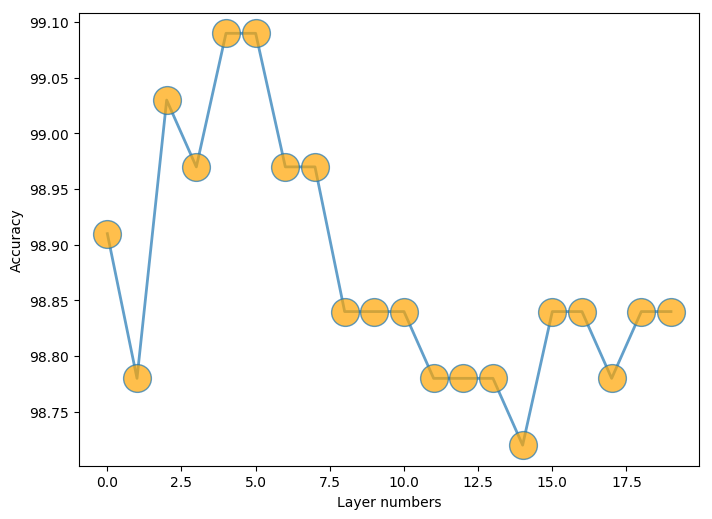

In [14]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [15]:
Accuracy

[98.91,
 98.78,
 99.03,
 98.97,
 99.09,
 99.09,
 98.97,
 98.97,
 98.84,
 98.84,
 98.84,
 98.78,
 98.78,
 98.78,
 98.72,
 98.84,
 98.84,
 98.78,
 98.84,
 98.84]